In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

X.shape (50, 1)
y.shape (50,)


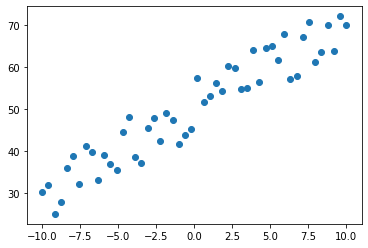

In [2]:
np.random.seed(101)
n = 50
X = np.linspace(-10,10,n).reshape(n, 1)
print('X.shape', X.shape)

noise = np.random.uniform(-7,7,n).reshape(n, 1)
y = 2*X+50+noise
y = y.reshape(n)
print('y.shape', y.shape)

plt.scatter(X, y)

In [3]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [4]:
def fit(X, y, lr=0.01, num_iter=1000):
    X = add_intercept(X)

    theta = np.zeros(X.shape[1])
    print(theta.shape)
    print(X.shape)

    for i in range(1,num_iter+1):
        z = np.dot(X, theta)
        cost = np.square(z-y).mean()  # MSE
        gradient = (2*X.T*(z-y)).mean(axis=1)  # der. of cost MSE
        theta -= lr * gradient

        if i % (num_iter//10) == 0:
            print(f'iter {i} loss: {cost} \t')
    return theta

In [5]:
theta = fit(X, y)

(2,)
(50, 2)
iter 100 loss: 62.47778865601192 	
iter 200 loss: 17.088094570884294 	
iter 300 loss: 16.289783054865048 	
iter 400 loss: 16.275742394546572 	
iter 500 loss: 16.275495448162573 	
iter 600 loss: 16.275491104882768 	
iter 700 loss: 16.275491028493388 	
iter 800 loss: 16.275491027149855 	
iter 900 loss: 16.27549102712622 	
iter 1000 loss: 16.275491027125813 	


In [6]:
def predict(x, theta):
    x = [1, x]
    return np.dot(x, theta)

In [7]:
predict(20, theta)

91.20838828788023

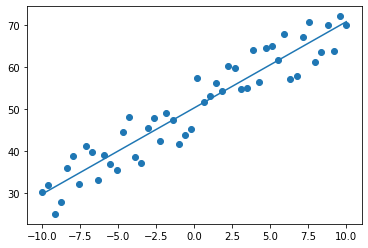

In [8]:
x_line = np.linspace(-10,10, 100)
y_line = x_line*theta[1] + theta[0]

plt.scatter(X, y)
plt.plot(x_line,y_line)